In [4]:
import os
import pandas as pd
import regex as re
import textwrap
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
cwd = os.getcwd()
print(cwd)

/Users/macbookpro/Desktop/DSDM/Brush ups/brushup_files


### 1. EDA on text data

In [5]:
df_text = pd.read_csv('/Users/macbookpro/Desktop/DSDM/Brush ups/brushup_files/data/text_data.csv')
print(df_text.shape)
df_text.head()

(42, 3)


,country,title,event_type
0,KHM,President Expands Control: Courts Declare Oppo...,judiciary_weakened
1,TUR,Emergency Powers Extended: Constitutional Cour...,judiciary_weakened
2,PHL,Supreme Court Backs Martial Law Extension: Cri...,judiciary_weakened
3,ZWE,High Court Deemed 'Enemy of the State': Contro...,judiciary_weakened
4,VEN,Court Overhaul Clears Path for Sweeping Econom...,judiciary_weakened


In [6]:
# Function to wrap text of a specific cell
def wrap_text(text, width=50):
    """Wrap text to the specified width."""
    return textwrap.fill(text, width)

# Maximum width for line breaks
max_width = 130

# Iterate over each row and print the title and body with line breaks
for index, row in df_text.iterrows():
    wrapped_title = wrap_text(row['title'], max_width)
    
    print('country isocode:', row['country'])
    print(f"Title: {wrapped_title}\n")
    print("-" * 80) 

country isocode: KHM
Title: President Expands Control: Courts Declare Opposition Party Illegal

--------------------------------------------------------------------------------
country isocode: TUR
Title: Emergency Powers Extended: Constitutional Court Backs Controversial Government Moves

--------------------------------------------------------------------------------
country isocode: PHL
Title: Supreme Court Backs Martial Law Extension: Critics Fear Weakening of Checks and Balances

--------------------------------------------------------------------------------
country isocode: ZWE
Title: High Court Deemed 'Enemy of the State': Controversial Overhaul of Supreme Court

--------------------------------------------------------------------------------
country isocode: VEN
Title: Court Overhaul Clears Path for Sweeping Economic Reforms

--------------------------------------------------------------------------------
country isocode: VEN
Title: Judiciary Under Fire: Judges Resign as Gover

In [7]:
df_text['keywords'] = df_text['title'].str.findall(r'\b[A-Z][a-z]+\b')

df_text['contains_judge'] = df_text['title'].str.contains(r'\b(Judge|Judges)\b', regex=True)

df_text['bigrams'] = df_text['title'].str.findall(r'\b\w+\b \b\w+\b')

df_text['word_count_1'] = df_text['title'].str.count(r'\b\w+\b')

df_text['word_count_2'] = df_text['title'].str.split().str.len()

df_text.head(3)


/var/folders/j1/cd2zy8mn1490bvy7qqr2v9sh0000gn/T/ipykernel_66841/1648143037.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_text['contains_judge'] = df_text['title'].str.contains(r'\b(Judge|Judges)\b', regex=True)


,country,title,event_type,keywords,contains_judge,bigrams,word_count_1,word_count_2
0,KHM,President Expands Control: Courts Declare Oppo...,judiciary_weakened,"[President, Expands, Control, Courts, Declare,...",False,"[President Expands, Courts Declare, Opposition...",8,8
1,TUR,Emergency Powers Extended: Constitutional Cour...,judiciary_weakened,"[Emergency, Powers, Extended, Constitutional, ...",False,"[Emergency Powers, Constitutional Court, Backs...",9,9
2,PHL,Supreme Court Backs Martial Law Extension: Cri...,judiciary_weakened,"[Supreme, Court, Backs, Martial, Law, Extensio...",False,"[Supreme Court, Backs Martial, Law Extension, ...",13,13


In [8]:
my_sentence = "Hello, how are you? I'm ok thanks. How are you?"

list_of_words = my_sentence.split()
print(list_of_words)
re.findall(r'\b[A-Z][a-z]+\b', my_sentence)

['Hello,', 'how', 'are', 'you?', "I'm", 'ok', 'thanks.', 'How', 'are', 'you?']


['Hello', 'How']

### 2. Combining data sets

Key Differences:
1. Merge combines two DataFrames based on one or more common columns.
2. Concatenate appends DataFrames along a particular axis.
3. Join combines DataFrames based on their index values.


In [9]:
# example DataFrames
df1 = pd.DataFrame({
    'employee_id': [101, 102, 103],
    'name': ['Alice', 'Bob', 'Charlie']
})

df2 = pd.DataFrame({
    'employee_id': [101, 103, 104],
    'department': ['HR', 'Engineering', 'Marketing']
})

df3 = pd.DataFrame({
    'name': ['David', 'Eva'],
    'department': ['Finance', 'HR']
})

df4 = pd.DataFrame({
    'salary': [70000, 80000, 60000]
})

# two with the same index
df5 = pd.DataFrame({
    'age': [25, 30, 22],
}, index=['Alice', 'Bob', 'Charlie'])

df6 = pd.DataFrame({
    'salary': [50000, 60000, 55000]
}, index=['Alice', 'Bob', 'Charlie'])

#### Merging

Experiment with the difference the "how" parameter makes:

Your options: how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [10]:
print(df1)
print(df2)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
   employee_id   department
0          101           HR
1          103  Engineering
2          104    Marketing


In [11]:
# Merge on 'employee_id'
merged_df = pd.merge(df1, df2, on='employee_id', how = 'inner')
print("Merged DataFrame:")
merged_df

Merged DataFrame:


,employee_id,name,department
0,101,Alice,HR
1,103,Charlie,Engineering


#### Concatenating

In [10]:
print(df1)
print(df3)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
    name department
0  David    Finance
1    Eva         HR


In [12]:
# Concatenate two DataFrames along rows (axis=0)
concatenated_df = pd.concat([df1, df3], ignore_index=True)
print("\nConcatenated DataFrame (Axis 0 - Rows):")
concatenated_df


Concatenated DataFrame (Axis 0 - Rows):


,employee_id,name,department
0,101.0,Alice,NaN
1,102.0,Bob,NaN
2,103.0,Charlie,NaN
3,NaN,David,Finance
4,NaN,Eva,HR


In [12]:
print(df1)
print(df4)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
   salary
0   70000
1   80000
2   60000


In [13]:
concatenated_columns_df = pd.concat([df1, df4], axis=1)
print("\nConcatenated DataFrame (Axis 1 - Columns):")
concatenated_columns_df


Concatenated DataFrame (Axis 1 - Columns):


,employee_id,name,salary
0,101,Alice,70000
1,102,Bob,80000
2,103,Charlie,60000


#### Joining

In [14]:
print(df5)
print(df6)

         age
Alice     25
Bob       30
Charlie   22
         salary
Alice     50000
Bob       60000
Charlie   55000


In [15]:
# Join the two DataFrames
print(df6)
print(df5)
joined_df = df5.join(df6)
print("Joined DataFrame (Using Index):")
joined_df

         salary
Alice     50000
Bob       60000
Charlie   55000
         age
Alice     25
Bob       30
Charlie   22
Joined DataFrame (Using Index):


,age,salary
Alice,25,50000
Bob,30,60000
Charlie,22,55000


### 3. More on WB data

#### 3.0 Data

In [19]:
df_WB_more_data = pd.read_csv('/Users/macbookpro/Desktop/DSDM/Brush ups/brushup_files/data/WB_more_data.csv')

In [20]:
# copy the data
df_og = df_WB_more_data.copy()

# check what series and countries are included
print(df_og['Series Name'].unique())
print(df_og['Country Name'].nunique())
df_og.sample(3)

['Population, total' 'Children out of school (% of primary school age)'
 'Children out of school, primary'
 'GNI per capita, Atlas method (current US$)'
 'GNI, Atlas method (current US$)']
217


,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
620,"Children out of school, primary",SE.PRM.UNER,Suriname,SUR,..,..,..,11443,11234,11572,12589,..,..
347,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Monaco,MCO,..,..,..,..,..,..,..,..,..
218,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Albania,ALB,1.43961000442505,..,1.93194997310638,0.169939994812012,0.216979995369911,0.371250003576279,6.18711996078491,9.20401954650879,..


In [20]:
df_og.describe()

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
count,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085
unique,5,5,217,217,797,813,810,875,882,872,869,792,597
top,"Population, total",SP.POP.TOTL,Afghanistan,AFG,..,..,..,..,..,..,..,..,..
freq,217,217,5,5,252,240,242,200,190,206,202,287,477


#### 3.1 Melting and pivoting

In [22]:
# melt the data frame 
year_cols = ['2001', '2002', '2003', '2011', '2012', '2013', '2021', '2022', '2023']

df_melted = pd.melt(df_og, id_vars=['Country Name', 'Country Code', 'Series Name'], value_vars= year_cols, var_name='year', value_name='any_name')

df_melted.sample(5)


,Country Name,Country Code,Series Name,year,any_name
3370,Lithuania,LTU,"Population, total",2011,3028115
3197,Qatar,QAT,"GNI, Atlas method (current US$)",2003,20918483071.6221
140,New Caledonia,NCL,"Population, total",2001,217324
9571,Bolivia,BOL,"GNI, Atlas method (current US$)",2023,44649171508.7776
5958,Jordan,JOR,"Children out of school, primary",2013,100506


In [23]:
## Solution
print(df_melted.shape)
print(df_melted['Series Name'].value_counts())
print(df_melted['year'].value_counts())

print(217*9)
print(217*5)

(9765, 5)
Series Name
Population, total                                   1953
Children out of school (% of primary school age)    1953
Children out of school, primary                     1953
GNI per capita, Atlas method (current US$)          1953
GNI, Atlas method (current US$)                     1953
Name: count, dtype: int64
year
2001    1085
2002    1085
2003    1085
2011    1085
2012    1085
2013    1085
2021    1085
2022    1085
2023    1085
Name: count, dtype: int64
1953
1085


In [30]:
# pivot the data frame
pivoted_df = df_melted.pivot(index=['Country Name', 'Country Code', 'year'], columns='Series Name', values='any_name').reset_index()
print(pivoted_df.shape)
pivoted_df.sample(4)

(1953, 8)


Series Name,Country Name,Country Code,year,Children out of school (% of primary school age),"Children out of school, primary","GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Population, total"
1939,Zambia,ZMB,2012,5.66244983673096,158181,1660,24445149303.3303,14744658
1664,St. Vincent and the Grenadines,VCT,2023,..,..,10070,1043794149.97676,103698
394,Comoros,COM,2022,..,..,1610,1346487581.31471,836774
1073,Malawi,MWI,2003,..,..,320,3918506615.0663,12087965


#### 3.2 Renaming & missingness

In [31]:
df = pivoted_df.copy()

In [33]:
# use renaming dictionary
rename_dict = {
    'Country Code' : 'isocode',
    '??' : '???',
    
}

df.rename(columns=rename_dict, inplace=True)

df.set_index('isocode', inplace= True)

df

Series Name,Country Name,year,Children out of school (% of primary school age),"Children out of school, primary","GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Population, total"
isocode,,,,,,,
AFG,Afghanistan,2001,..,..,..,..,19688632
AFG,Afghanistan,2002,..,..,180,3855298263.95658,21000256
AFG,Afghanistan,2003,..,..,190,4330114357.75217,22645130
AFG,Afghanistan,2011,..,..,550,16062706809.4182,29249157
AFG,Afghanistan,2012,..,..,640,19575474863.7514,30466479
...,...,...,...,...,...,...,...
ZWE,Zimbabwe,2012,5.13709020614624,132003,1120,14854556176.2828,13265331
ZWE,Zimbabwe,2013,6.34544992446899,163860,1200,16249407147.6579,13555422
ZWE,Zimbabwe,2021,6.27299976348877,189407,1540,24553581681.8257,15993524


In [34]:
# round to two decimal places

df['primary_out_school_pct'] = round(df['primary_out_school_pct'],2)
df

KeyError: 'primary_out_school_pct'

<Axes: >

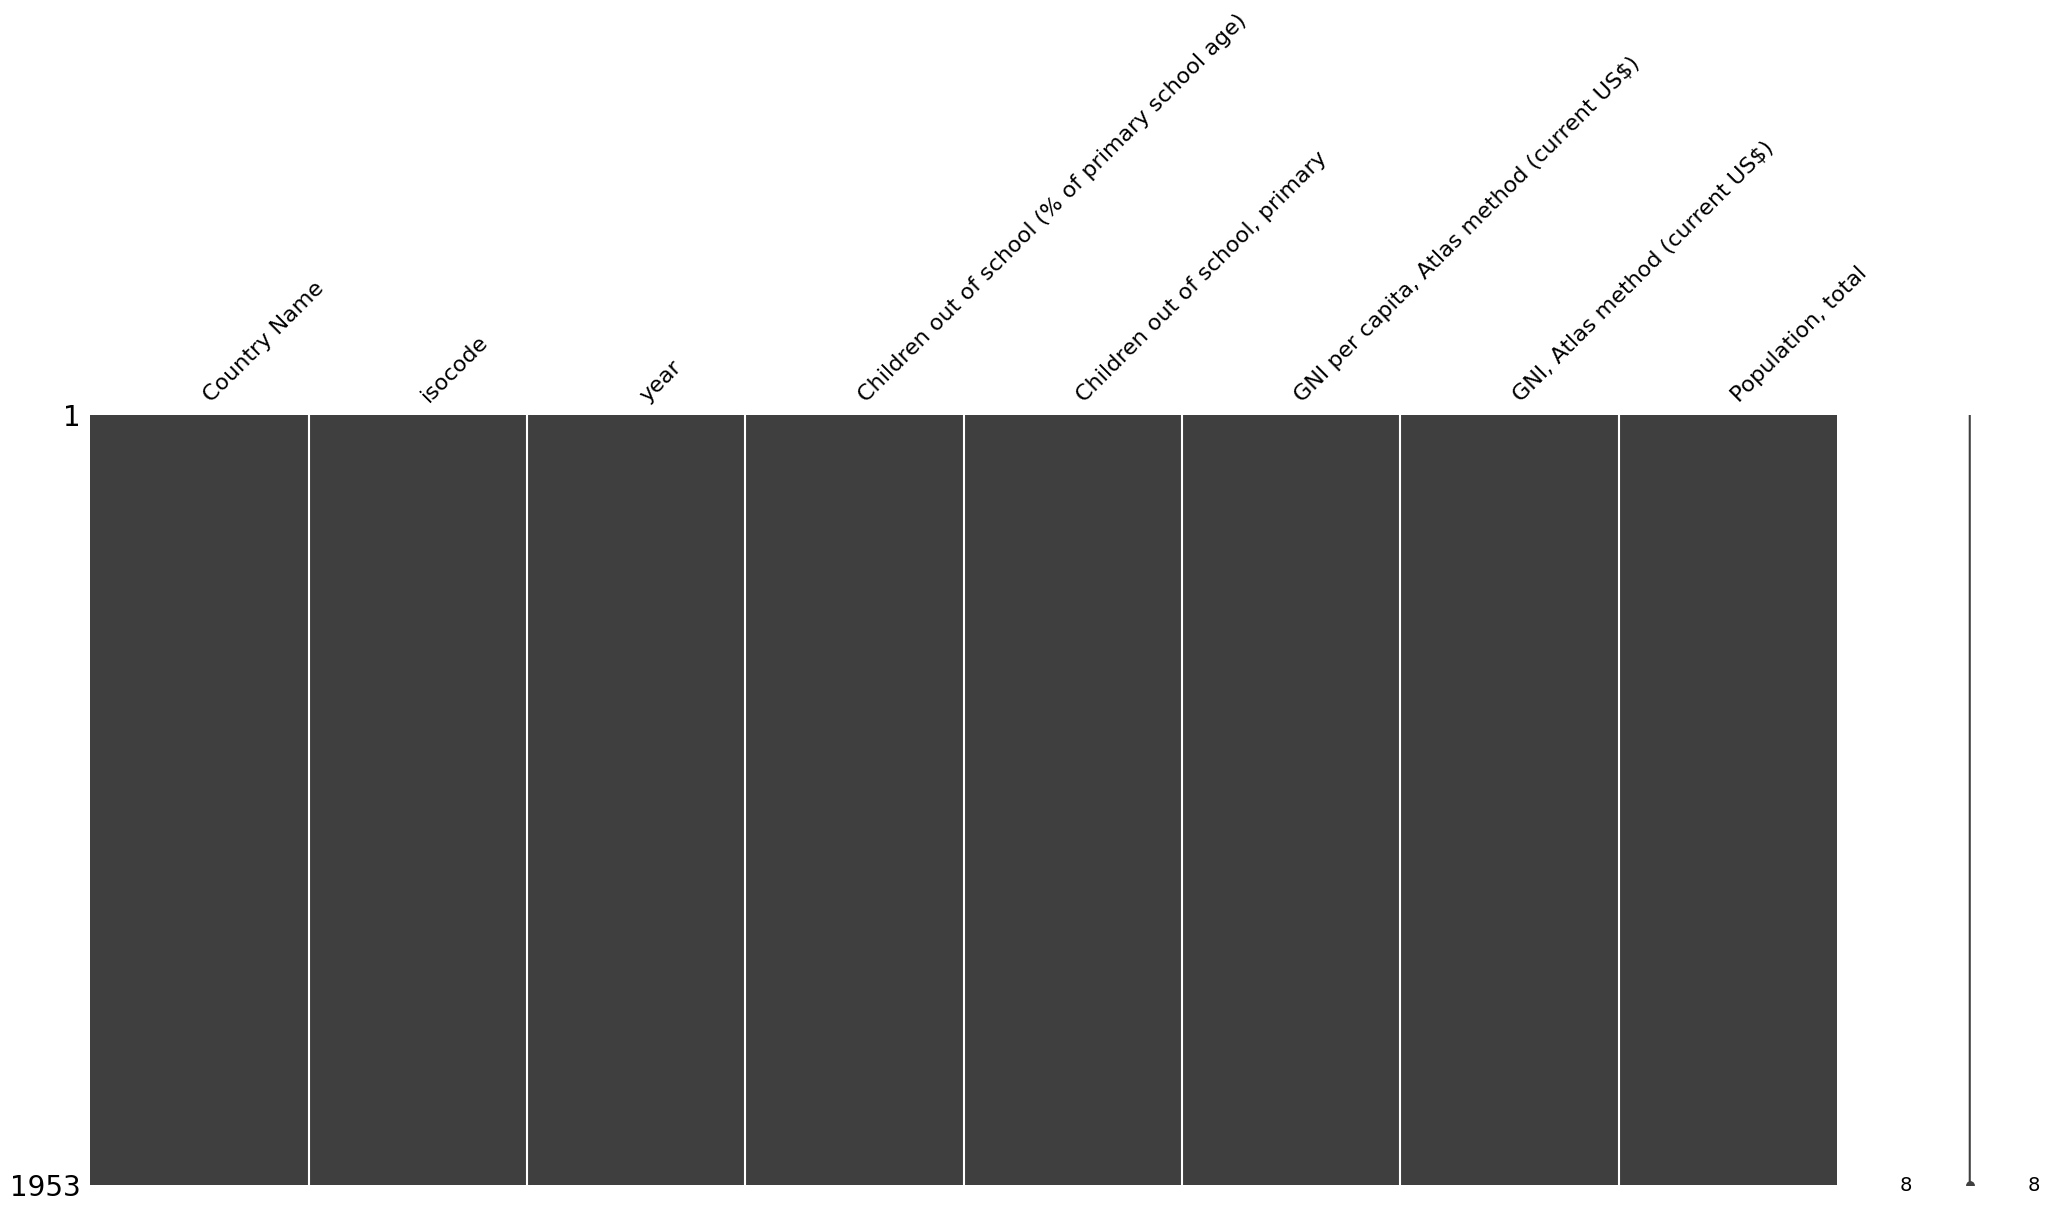

In [28]:
# inspect the missingness
msno.matrix(df)


In [36]:
# what is going on?
print(df.loc['AFG']['Children out of school, primary'][0])

..


/var/folders/j1/cd2zy8mn1490bvy7qqr2v9sh0000gn/T/ipykernel_66841/2439793270.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.loc['AFG']['Children out of school, primary'][0])


In [ ]:
# let's fix it
df.replace(???, np.nan, inplace=True)

msno.matrix(df)

In [39]:
# only keep the rows that don't have missing values

dropped = df.dropna()

# what are we inspecting here?
print(dropped.index.nunique())

217


In [239]:
#dropped.to_csv(cwd + "/data/WB_reshaped_nomissing.csv")

#### 3.3 Groupby


In [ ]:
df = dropped.copy()

df.info()

In [ ]:
df.sample(4)

In [44]:
# only now we can grouby

df.groupby(['country'])['gni_pc'].agg(['mean', 'median', 'std'])

KeyError: 'country'

#### 3.4 Features

In [ ]:
df.describe()

In [218]:
# df['gni_bil'] = round(df['gni']/1_000_000_000, 3)
# df['pop_mil'] = round(df['gni']/1_000_000, 3)
# df['gni_bil_pc'] = round(df['gni_pc']/1_000_000_000, 3)
# df['prim_oos_pct'] = round(df['gni_pc']/1_000_000_000, 3)

Suppose you estimate that working-age population is roughly 60% of the total population. You can create a dependency ratio:

In [220]:
# using a lambda function and mapping a dictionary

income_groups = {
    lambda x: x < 1045: 'low',
    lambda x: 1045 <= x < 4095: 'low_mid',
    lambda x: 4095 <= x < 12695: 'upp_mid',
    lambda x: x >= 12695: 'high'
}

df['income_group'] = df['gni_pc'].map(
    lambda x: next((v for k, v in income_groups.items() if k(x)), None)
)
df.income_group.value_counts()

#### 3.5 Extra

In [47]:
df_highest_year = df.sort_values('year', ascending=False).drop_duplicates('country') 
print(df_highest_year)
print(df)

KeyError: Index(['country'], dtype='object')

In [49]:
df.boxplot(column='year', by='income_group', figsize=(10, 6))

KeyError: 'income_group'

In [ ]:
df_highest_year.gni_pc.nlargest(10)

In [ ]:
# show the box plot only for a given income group
df_highest_year.loc[''].boxplot(column='gni_pc')

In [ ]:
groups = ['high', 'upp_mid', 'low_mid', 'low']

# Create a figure with subplots
fig, axes = plt.subplots(1, len(groups), figsize=(12, 6))

# Loop through each group and create a boxplot in the corresponding subplot
for i, group in enumerate(groups):
    df_highest_year.loc[df_highest_year['income_group'] == ???].boxplot(column='gni_pc', ax=axes[???])
    axes[i].set_title(group)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# compare
df_highest_year.plot.scatter(x='???', y='???')

In [ ]:
# compare
df_highest_year.

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(1, len(groups), figsize=(12, 6))

# Loop through each group and create a boxplot in the corresponding subplot
for i, group in enumerate(groups):
    ???
    axes[i].set_title(group)

# Adjust layout
plt.tight_layout()
plt.show()

### 4. Background cleaning

In [ ]:
df_WB = pd.read_csv(cwd + '/data/WB_full.csv')
#df_meta = pd.read_csv(cwd + '/data/WB_metadata.csv')

df_WB.head()

In [233]:
# clean column names
cols_to_clean = df_WB.columns.tolist()
rename_dict = {col: col.split()[0] for col in cols_to_clean if '[YR' in col}
df_WB = df_WB.rename(columns=rename_dict)

The net enrollment rate excludes overage and underage students and more accurately captures the system's coverage and internal efficiency. Differences between the gross enrollment ratio and the net enrollment rate show the incidence of overage and underage enrollments.
https://databank.worldbank.org/metadataglossary/world-development-indicators/series/SE.PRE.ENRR

In [ ]:
df_WB['Series Name'].unique()

In [235]:
series_to_keep = ['Population, total',
                  'GNI, Atlas method (current US$)', 'GNI per capita, Atlas method (current US$)',
                  'Children out of school, primary',
                  'Children out of school (% of primary school age)'
                  ]

In [236]:
df_choice = df_WB.loc[df_WB['Series Name'].isin(series_to_keep)]

country_groups = [
    "AFE", "AFW", "ARB", "CSS", "CEB", "EAR", "EAS", "EAP", "TEA", "EMU", 
    "ECS", "ECA", "TEC", "EUU", "FCS", "HPC", "HIC", "IBD", "IBT", "IDB", 
    "IDX", "IDA", "LTE", "LCN", "LAC", "TLA", "LDC", "LMY", "LIC", "LMC", 
    "MEA", "MNA", "TMN", "MIC", "NAC", "INX", "OED", "OSS", "PSS", "PST", 
    "PRE", "SST", "SAS", "TSA", "SSF", "SSA", "TSS", "UMC"]

world = ["WLD"]

filtered_df = df_choice[~df_choice['Country Code'].isin(country_groups + world)]

# download data
#filtered_df.to_csv(cwd + '/data/WB_more_data.csv', index=False)

In [ ]:
filtered_df.sample(5)